In [1]:
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, recall_at_k
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pathlib import Path
import os

from grammar_ru.corpus.formats.fb2_scripts import Fb2Scripts

In [2]:
extract_to = Path("/home/mixailkys/DataSpell_Projects/grammar_ru/diplom/data")

In [51]:
author = 'Erikson'
from_ = extract_to / author / 'zip'
to_ = extract_to / author / 'md'
Fb2Scripts.convert_all(from_, to_)

In [64]:
extracted_files = os.listdir(to_)
author = 'Erikson'
series = 'Malazan Book of the Fallen'
series_ids = {
    'Gardens of the moon': 1,
    'Deadhouse gates': 2,
    'Memories of ice': 3,
    'House of chains': 4,
    'Midnight tides': 5,
    'The bonehunters': 6,
    "Reapers gale": 7,
    'Toll the hounds': 8,
    'Dust of dreams': 9,
    'The crippled god': 10,
}
for file in extracted_files:
    file_name = file
    rename_to = file.split('-')
    rename_to = [author] + [series] + [' '.join(rename_to[1].split('_')).capitalize().strip()]
    rename_to.append(str(series_ids[rename_to[-1]]))
    rename_to = '-'.join(rename_to)
    os.rename(to_ / file_name, to_ / f"{rename_to}.md")

In [69]:
author = 'Goodkind'
from_ = extract_to / author / 'zip'
to_ = extract_to / author / 'md'
Fb2Scripts.convert_all(from_, to_)

In [78]:
os.rename(to_ / "terri_gudkajnd-chainfire_chainfire_trilo-6267b46ef2dc7.fb2.md", to_ / "terri_gudkajnd-chainfire-6267b46ef2dc7.fb2.md")
os.rename(to_ / "terri_gudkajnd-confessor_chainfire_trilo-6267b5a44a619.fb2.md", to_ / "terri_gudkajnd-confessor-6267b5a44a619.fb2.md")
os.rename(to_ / "terri_gudkajnd-phantom_chainfire_trilogy-6267b466cefcc.fb2.md", to_ / "terri_gudkajnd-phantom-6267b466cefcc.fb2.md")

In [82]:
extracted_files = os.listdir(to_)
author = 'Goodkind'
series = 'The Sword of Truth'
series_ids = {
    'The first confessor the l': 1,
    'Debt of bones': 2,
    "Wizards first rule": 3,
    'Stone of tears': 4,
    'Blood of the fold': 5,
    'Temple of the winds': 6,
    'Soul of the fire': 7,
    'Faith of the fallen': 8,
    'The pillars of creation': 9,
    'Naked empire': 10,
    'Chainfire': 11,
    'Phantom': 12,
    'Confessor': 13,
    'The omen machine': 14,
    'The third kingdom': 15,
    'Severed souls': 16,
    'Warheart': 17,
    'The scribbly man': 18,
    'Hateful things': 19,
    'Wasteland': 20,
    "Witchs oath": 21,
    'Into darkness': 22,
    "Deaths mistress": 23,
    'Shroud of eternity': 24,
    'Siege of stone': 25,
    'Heart of black ice': 26,
}
for file in extracted_files:
    file_name = file
    rename_to = file.split('-')
    rename_to = [author] + [series] + [' '.join(rename_to[1].split('_')).capitalize().strip()]
    rename_to.append(str(series_ids[rename_to[-1]]))
    rename_to = '-'.join(rename_to)
    os.rename(to_ / file_name, to_ / f"{rename_to}.md")

In [36]:

author = 'Hubbard'
from_ = extract_to / author / 'zip'
to_ = extract_to / author / 'md'
Fb2Scripts.convert_all(from_, to_)

In [38]:
os.rename(to_ / "avidreaders.ru__black-genesis.fb2.md", to_ / "avidreaders.ru__mission-earth-black-genesis.fb2.md")

In [39]:
extracted_files = os.listdir(to_)
author = 'Hubbard'
series = 'Mission Earth'
series_ids = {
    'Plan': 1,
    'Black genesis': 2,
    'The enemy within': 3,
    'An alien affair': 4,
    'Fortune of fear': 5,
    'Death quest': 6,
    'Voyage of vengeance': 7,
    'Disaster': 8,
    'Villainy victorious': 9,
    'Doomed planet': 10,
}
for file in extracted_files:
    file_name = file
    rename_to = file.split('__')[1].split('.')[0].split('-')
    rename_to = [author] +[series] + [' '.join(rename_to[2:]).capitalize()]
    rename_to.append(str(series_ids[rename_to[-1]]))
    rename_to = '-'.join(rename_to)
    os.rename(to_ / file_name, to_ / f"{rename_to}.md")

In [2]:
from grammar_ru.corpus import CorpusBuilder
from pathlib import Path
diplom_path = Path("/home/mixailkys/DataSpell_Projects/grammar_ru/diplom/data")
path_all_data = diplom_path / "to_new_corpus"
path_to_corpora = diplom_path / "corpora"   
CorpusBuilder.convert_interformat_folder_to_corpus(
    corpus_path=Path(path_to_corpora /'updated_diplom.base.zip'),
    md_folder=path_all_data,
    naming=['author','series','book_name','id_in_series']
)

  0%|          | 0/73 [00:00<?, ?it/s]

In [4]:
from grammar_ru.corpus import CorpusReader, CorpusBuilder
from diplom.utils.corpus_utils import CorpusFramework
from diplom.utils.dialog_markuper import DialogMarkupFeaturizer

In [5]:
path_corpus = Path("../data/corpora/updated_diplom.base.zip")
corpus = CorpusReader(path_corpus)
corpus_framework = CorpusFramework(corpus)

In [17]:
book = corpus_framework.get_book_by_author_and_series_id('Goodkind', 1)
chapter = corpus_framework.get_chapter_as_bundle(book, 7).src
chapter.loc[chapter.word_type == 'punct','word'].value_counts()

word
.    115
,     94
“     44
”     43
’     18
?     17
Name: count, dtype: int64

In [18]:
CorpusBuilder.featurize_corpus(
    path_corpus,
    Path(f"./data/corpora/updated_diplom.featurized.zip"),
    [
        DialogMarkupFeaturizer(['"','“','”','“',"'","‘",'’','»','«']),
    ]
)

2024-05-24 21:01:32.287750 INFO: Processing 51a70e65-d2a4-467e-bc8c-e7ab32f0ec77 at #0, total 4676 
2024-05-24 21:01:32.288480 INFO: <class 'diplom.utils.dialog_markuper.DialogMarkupFeaturizer'>
2024-05-24 21:01:32.327006 INFO: Processing dd361479-8d7e-43e2-bb2e-5d77ee9d2834 at #1, total 4676 
2024-05-24 21:01:32.327919 INFO: <class 'diplom.utils.dialog_markuper.DialogMarkupFeaturizer'>
2024-05-24 21:01:32.460176 INFO: Processing d4b2fc8a-3603-402d-bd47-2f16af193e3b at #2, total 4676 
2024-05-24 21:01:32.460921 INFO: <class 'diplom.utils.dialog_markuper.DialogMarkupFeaturizer'>
2024-05-24 21:01:32.700830 INFO: Processing a84cfe38-33a0-4126-b837-f63b8d033a42 at #3, total 4676 
2024-05-24 21:01:32.701276 INFO: <class 'diplom.utils.dialog_markuper.DialogMarkupFeaturizer'>
2024-05-24 21:01:32.902892 INFO: Processing 334619a8-63de-48e1-a019-1790e77569c5 at #4, total 4676 
2024-05-24 21:01:32.903625 INFO: <class 'diplom.utils.dialog_markuper.DialogMarkupFeaturizer'>
2024-05-24 21:01:33.81116

In [5]:
from grammar_ru.corpus import CorpusReader, CorpusBuilder
from diplom.utils.corpus_utils import CorpusFramework
path_corpus = Path("../data/corpora/updated_diplom.featurized.zip")
corpus = CorpusReader(path_corpus)
corpus_framework = CorpusFramework(corpus)

In [20]:
from diplom.utils.speech_action_maker import SpeechActionFeaturizer

In [21]:
CorpusBuilder.featurize_corpus(
    path_corpus,
    Path(f"../data/corpora/updated_diplom.complete.zip"),
    [
        SpeechActionFeaturizer(['"','“','”','“',"'","‘",'’','»','«']),
    ]
)

2024-05-25 00:17:07.778924 INFO: Processing 51a70e65-d2a4-467e-bc8c-e7ab32f0ec77 at #0, total 4676 
2024-05-25 00:17:07.779436 INFO: <class 'diplom.utils.speech_action_maker.SpeechActionFeaturizer'>
2024-05-25 00:17:07.816284 INFO: Processing dd361479-8d7e-43e2-bb2e-5d77ee9d2834 at #1, total 4676 
2024-05-25 00:17:07.816958 INFO: <class 'diplom.utils.speech_action_maker.SpeechActionFeaturizer'>
2024-05-25 00:17:07.852994 INFO: Processing d4b2fc8a-3603-402d-bd47-2f16af193e3b at #2, total 4676 
2024-05-25 00:17:07.853575 INFO: <class 'diplom.utils.speech_action_maker.SpeechActionFeaturizer'>
2024-05-25 00:17:07.997533 INFO: Processing a84cfe38-33a0-4126-b837-f63b8d033a42 at #3, total 4676 
2024-05-25 00:17:07.998537 INFO: <class 'diplom.utils.speech_action_maker.SpeechActionFeaturizer'>
2024-05-25 00:17:08.133986 INFO: Processing 334619a8-63de-48e1-a019-1790e77569c5 at #4, total 4676 
2024-05-25 00:17:08.135498 INFO: <class 'diplom.utils.speech_action_maker.SpeechActionFeaturizer'>
2024-

In [2]:
from grammar_ru.corpus import CorpusReader, CorpusBuilder
from diplom.utils.corpus_utils import CorpusFramework
path_corpus = Path(f"../data/corpora/updated_diplom.complete.zip")
corpus = CorpusReader(path_corpus)
corpus_framework = CorpusFramework(corpus)

In [4]:
from tqdm import tqdm
authors = corpus.get_toc().author.unique()
whole_dataset = []

for author in tqdm(authors):
    series_count = len(corpus_framework.get_books_by_author(author))
    for book_id in range(series_count):
        try:
            book = corpus_framework.get_book_by_author_and_series_id(author, book_id)
        except IndexError:
            print(f"Не нашлась книга {book_id} для {author}, проверить df")
            continue
        chapters_count = len(book)
        for chapter_id in range(chapters_count):
            chapter = corpus_framework.get_chapter_as_bundle(book, chapter_id)
            whole_dataset.append(chapter)

  0%|          | 0/6 [00:00<?, ?it/s]

Не нашлась книга 0 для Hubbard, проверить df


 17%|█▋        | 1/6 [03:27<17:19, 207.86s/it]

Не нашлась книга 0 для Goodkind, проверить df


 50%|█████     | 3/6 [13:45<13:31, 270.46s/it]

Не нашлась книга 0 для Erikson, проверить df


 67%|██████▋   | 4/6 [17:08<08:07, 243.82s/it]

Не нашлась книга 0 для dzhordzh martin, проверить df


 83%|████████▎ | 5/6 [18:37<03:08, 188.12s/it]

Не нашлась книга 0 для dzhoan rouling, проверить df
Не нашлась книга 2 для dzhoan rouling, проверить df


100%|██████████| 6/6 [19:31<00:00, 195.33s/it]


In [5]:
text_corpus = pd.concat([d.speech_action for d in whole_dataset])

In [23]:
qq = text_corpus.loc[text_corpus.action != 'said']
qqq = qq.loc[qq.action != 'saying']
qqq.action.value_counts()

action
muttered    979
say         841
called      804
murmured    531
growled     490
           ... 
Saying        1
Called        1
hooting       1
sniffled      1
dazed         1
Name: count, Length: 362, dtype: int64

<AxesSubplot: ylabel='count'>

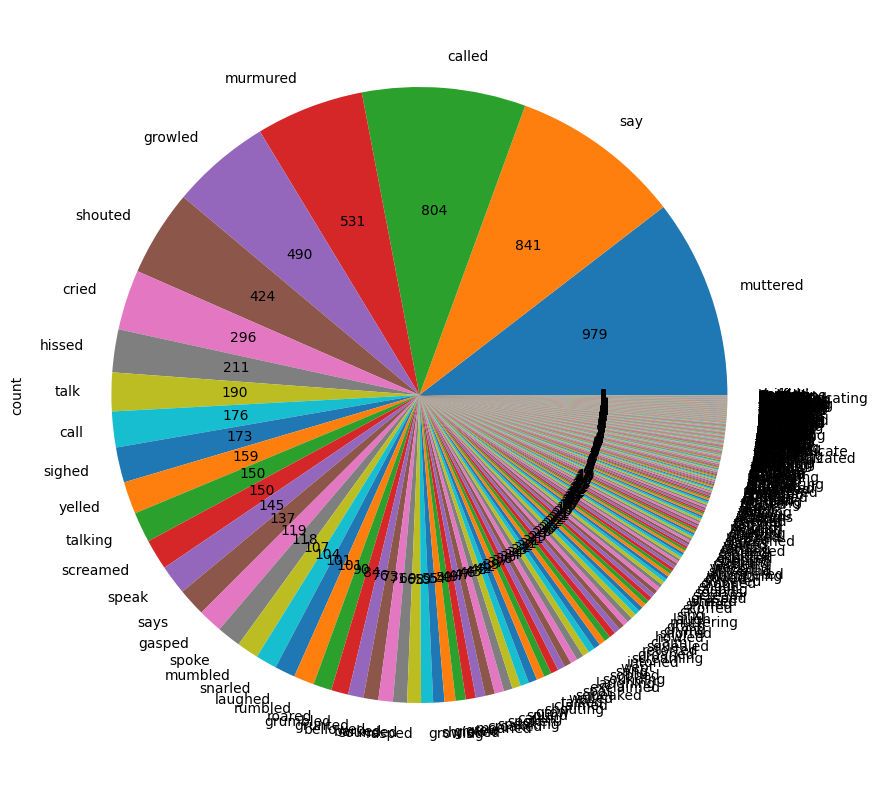

In [20]:
pie_count = lambda x: '{:.0f}'.format(x * (qqq['action'].count()) / 100)
qqq.action.value_counts().plot(kind='pie', figsize=(10,10),autopct=pie_count)

In [11]:
qwer = pd.read_csv('../text_corpus.csv')

<AxesSubplot: ylabel='count'>

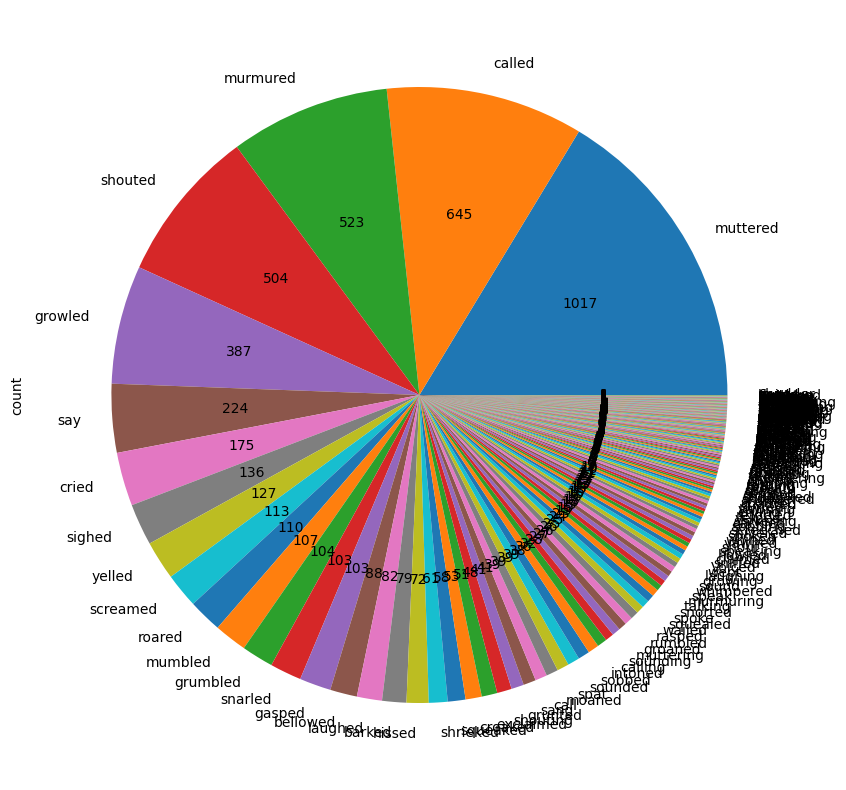

In [21]:
www = qwer.loc[qwer.action != 'said']
rr = www.loc[www.action != 'saying']
pie_count = lambda x: '{:.0f}'.format(x * (rr['action'].count()) / 100)
rr.action.value_counts().plot(kind='pie', figsize=(10,10),autopct=pie_count)

In [22]:
rr.action.value_counts()

action
muttered     1017
called        645
murmured      523
shouted       504
growled       387
             ... 
weep            1
twittered       1
fluted          1
howls           1
shudder         1
Name: count, Length: 223, dtype: int64

In [24]:
text_corpus = text_corpus.reset_index(drop=True).to_csv('updated_text_corpus.csv')
# text_corpus.sample_id = text_corpus.index
# text_corpus.to_csv('text_corpus.csv', index=False)

In [25]:
merged = pd.concat([rr, qqq])

In [29]:
merged = merged.drop('sample_id', axis=1)

In [31]:
len(merged)

15597

In [38]:
len(merged.drop_duplicates(subset=['speech']))

11240

In [40]:
merged = merged.drop_duplicates(subset=['speech'])

In [42]:
for speech in tqdm(merged.speech):
    len_s = len(merged.loc[merged.speech == speech])
    if len_s > 1:
        print(speech, len_s)

100%|██████████| 11240/11240 [00:20<00:00, 561.40it/s]


In [46]:
merged.reset_index(drop=True).to_csv('updated_text_corpus.csv')

In [47]:
merged.action.value_counts()

action
muttered    1417
called       991
say          819
murmured     710
growled      648
            ... 
bespoke        1
larking        1
pecked         1
nested         1
ragged         1
Name: count, Length: 379, dtype: int64

In [45]:
merged.action.nunique()

379

<AxesSubplot: ylabel='count'>

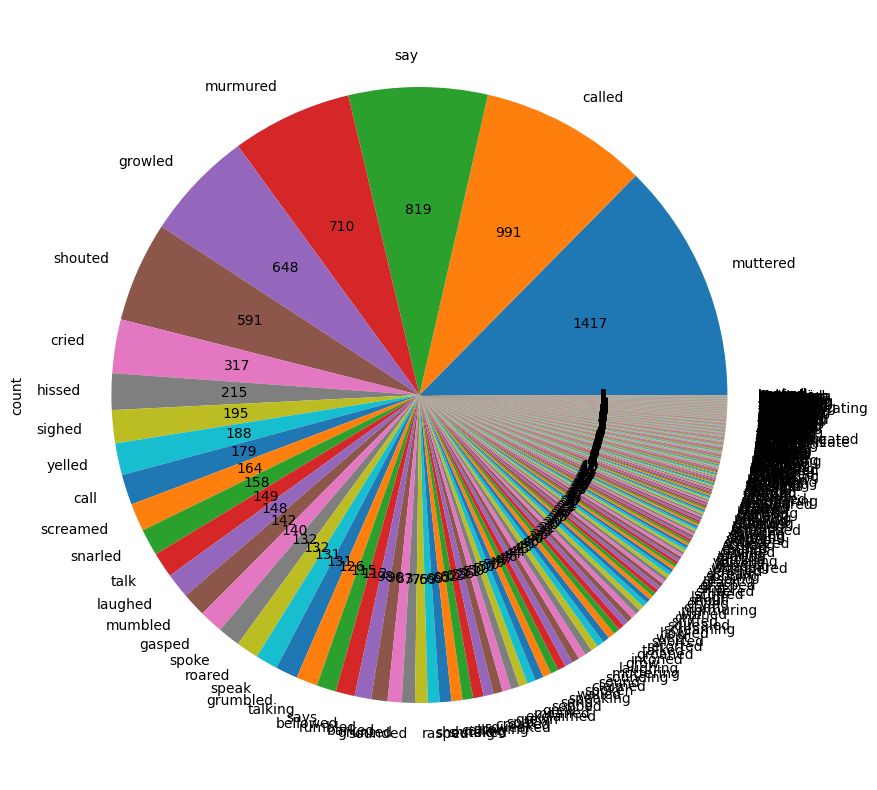

In [44]:
pie_count = lambda x: '{:.0f}'.format(x * (merged['action'].count()) / 100)
merged.action.value_counts().plot(kind='pie', figsize=(10,10),autopct=pie_count)

In [36]:
merged.loc[merged.speech == 'Embrace death,']

,speech,action
7,"Embrace death,",sounding


In [27]:
len(merged)

15597

In [14]:
import pandas as pd
df = pd.read_csv('../updated_text_corpus.csv', index_col=0)

In [ ]:
df.action = df.action.str.replace('saying', 'say')

In [17]:
df.action = df.action.str.lower()

In [24]:
df.action.value_counts()

action
muttered     1417
called        992
say           826
murmured      710
growled       648
             ... 
hollowed        1
twittered       1
hiss            1
gouging         1
ragged          1
Name: count, Length: 356, dtype: int64

In [34]:
only_ing = df.loc[df.action.str.contains('ing'),'action'].value_counts()

In [57]:
convert_dict = {
    'talking': 'talked',
    'shouting': 'shouted',
    'calling': 'called',
    'growing': 'grew',
    'speaking': 'spoke',
    'muttering': 'muttered',
    'sounding': 'sounded',
    'laughing': 'laughed',
    'screaming': 'screamed',
    'murmuring': 'murmured',
    'crying': 'cried',
    'sing': 'sang',
    'sobbing': 'sobbed',
    'rasping': 'rasped',
    'yelling': 'yelled',
    'roaring': 'roared',
    'yawning': 'yawned',
    'hissing': 'hissed',
    'giggling': 'giggled',
    'humming': 'hummed',
    'barking': 'barked',
    'claiming': 'claimed',
    'call': 'called',
    'talk': 'talked',
    'speak': 'spoke',
    'says': 'said',
    'cry': 'cried',
    'shout': 'shouted',
    'laugh': 'laughed',
    'grasp': 'grasped',
    'scream': 'screamed',
    'shivering': 'shivered',
    'weeping': 'wept',
    'rattling': 'rattled',
    'sounds': 'sounded',
    'calls': 'called',
    'spitting': 'spat',
    'poking': 'poked',
}

In [58]:
df.action = df.action.replace(convert_dict)

In [62]:
df.action.value_counts().plot(kind='pie', figsize=(10,10),autopct=pie_count)

NameError: name 'pie_count' is not defined

In [70]:
df.reset_index(drop=True).to_csv('../updated_text_corpus.csv')

In [65]:
counts = df.action.value_counts()
filtered_df = df[df.action.isin(counts[counts >= 10].index)]

In [69]:
    filtered_df.reset_index(drop=True).to_csv('../filtered_updated_text_corpus.csv')

In [68]:
filtered_df.action.value_counts()

action
muttered     1464
called       1251
say           826
murmured      733
shouted       681
             ... 
hummed         11
screeched      11
chanted        11
purred         10
cackled        10
Name: count, Length: 70, dtype: int64

In [64]:
qq = df.action.value_counts()
qq.loc[qq >= 10]

action
muttered     1464
called       1251
say           826
murmured      733
shouted       681
             ... 
hummed         11
chanted        11
screeched      11
purred         10
cackled        10
Name: count, Length: 70, dtype: int64

In [44]:
only_ing = df.loc[df.action.str.contains('ing'),'action'].value_counts()

In [45]:
only_ing

action
shivering    16
weeping      15
rattling     14
claiming     11
poking       10
             ..
saying        1
gouging       1
quavering     1
gloating      1
gargling      1
Name: count, Length: 87, dtype: int64

In [40]:
qq = [v for v in only_ing.index.values]